# Ejercicios de Probabilidad Condicional con Simulación Monte Carlo

Este notebook contiene tres ejercicios resueltos sobre probabilidad condicional con simulaciones de Monte Carlo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración de visualización
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

---

# Ejercicio 1: Selección de Representante del Pueblo

## Planteamiento

La población de adultos en un pequeño pueblo que han satisfecho los requisitos para graduarse en la escuela. Se deben clasificar de acuerdo con su sexo y a si trabajan o no actualmente.

### Tabla de Contingencia

|            | Empleado | Desempleado | Total |
|------------|----------|-------------|-------|
| Hombre     | 460      | 40          | 500   |
| Mujer      | 140      | 260         | 400   |
| **Total**  | **600**  | **300**     | **900** |

### Eventos

- **H**: Se escoge un hombre
- **E**: El elegido tiene empleo

### Objetivo

Calcular **P(H|E)**: La probabilidad de que se escoja un hombre dado que el elegido tiene empleo.

In [2]:
# Cálculo analítico P(H|E)
hombres_empleados = 460
total_empleados = 600

P_H_dado_E = hombres_empleados / total_empleados

print("="*60)
print("RESULTADO EJERCICIO 1 (Analítico)")
print("="*60)
print(f"P(H|E) = {hombres_empleados}/{total_empleados} = {P_H_dado_E:.6f}")
print(f"En porcentaje: {P_H_dado_E * 100:.2f}%")
print("="*60)

RESULTADO EJERCICIO 1 (Analítico)
P(H|E) = 460/600 = 0.766667
En porcentaje: 76.67%


## Simulación Monte Carlo - Ejercicio 1

In [3]:
# Simulación Monte Carlo para Ejercicio 1
np.random.seed(42)

# Crear población
poblacion = []
# Hombres empleados
poblacion.extend([('H', 'E')] * 460)
# Hombres desempleados
poblacion.extend([('H', 'D')] * 40)
# Mujeres empleadas
poblacion.extend([('M', 'E')] * 140)
# Mujeres desempleadas
poblacion.extend([('M', 'D')] * 260)

# Número de simulaciones
n_simulaciones = 100000

# Arrays para almacenar resultados
probabilidades_convergencia = []
hombres_empleados_count = 0
empleados_count = 0

# Simulación
for i in range(n_simulaciones):
    # Seleccionar persona aleatoria
    persona = poblacion[np.random.randint(0, len(poblacion))]
    sexo, empleo = persona
    
    # Si está empleado
    if empleo == 'E':
        empleados_count += 1
        if sexo == 'H':
            hombres_empleados_count += 1
    
    # Calcular probabilidad acumulada cada 100 iteraciones
    if (i + 1) % 100 == 0 and empleados_count > 0:
        prob_actual = hombres_empleados_count / empleados_count
        probabilidades_convergencia.append(prob_actual)

# Resultado final
P_H_dado_E_montecarlo = hombres_empleados_count / empleados_count

print("\n" + "="*60)
print("RESULTADO EJERCICIO 1 (Monte Carlo)")
print("="*60)
print(f"Simulaciones: {n_simulaciones:,}")
print(f"P(H|E) Monte Carlo = {P_H_dado_E_montecarlo:.6f}")
print(f"P(H|E) Analítico   = {P_H_dado_E:.6f}")
print(f"Error absoluto     = {abs(P_H_dado_E_montecarlo - P_H_dado_E):.6f}")
print("="*60)


RESULTADO EJERCICIO 1 (Monte Carlo)
Simulaciones: 100,000
P(H|E) Monte Carlo = 0.765188
P(H|E) Analítico   = 0.766667
Error absoluto     = 0.001478


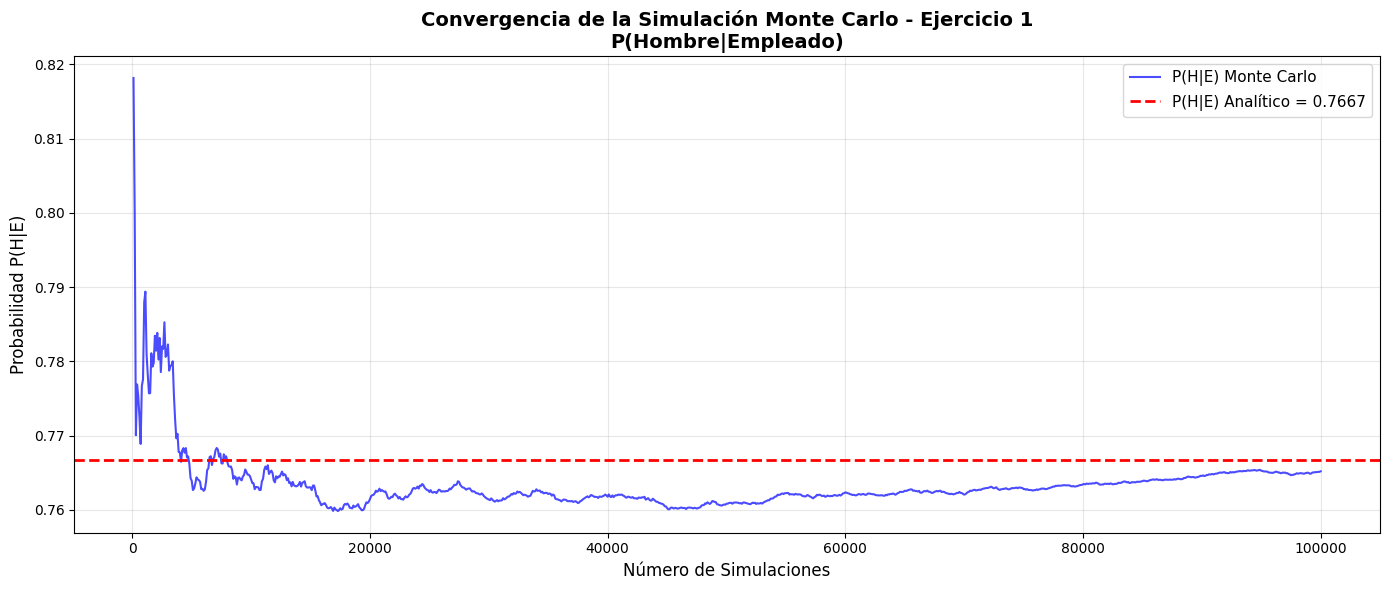

In [4]:
# Gráfico de convergencia - Ejercicio 1
fig, ax = plt.subplots(figsize=(14, 6))

iteraciones = np.arange(100, n_simulaciones + 1, 100)
ax.plot(iteraciones, probabilidades_convergencia, 'b-', alpha=0.7, linewidth=1.5, label='P(H|E) Monte Carlo')
ax.axhline(y=P_H_dado_E, color='r', linestyle='--', linewidth=2, label=f'P(H|E) Analítico = {P_H_dado_E:.4f}')

ax.set_xlabel('Número de Simulaciones', fontsize=12)
ax.set_ylabel('Probabilidad P(H|E)', fontsize=12)
ax.set_title('Convergencia de la Simulación Monte Carlo - Ejercicio 1\nP(Hombre|Empleado)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# Ejercicio 2: Probabilidad de Vuelos

## Planteamiento

La probabilidad de que un vuelo de programación regular despegue a tiempo es de **P(D) = 0.83**; la de que llegue a tiempo es de **P(A) = 0.82**; y la de que despegue y llegue a tiempo **P(D ∩ A) = 0.78**.

### Eventos

- **D**: El vuelo despega a tiempo
- **A**: El vuelo llega (arriba) a tiempo

### Objetivos

**a)** Llegue a tiempo dado que despegó a tiempo: **P(A|D)**

**b)** Despegue a tiempo dado que llegó a tiempo: **P(D|A)**

In [5]:
# Datos del Ejercicio 2
P_D = 0.83
P_A = 0.82
P_D_and_A = 0.78

# Cálculos analíticos
P_A_dado_D = P_D_and_A / P_D
P_D_dado_A = P_D_and_A / P_A

print("="*60)
print("RESULTADOS EJERCICIO 2 (Analítico)")
print("="*60)
print(f"a) P(A|D) = {P_D_and_A} / {P_D} = {P_A_dado_D:.6f}")
print(f"   En porcentaje: {P_A_dado_D * 100:.2f}%")
print(f"\nb) P(D|A) = {P_D_and_A} / {P_A} = {P_D_dado_A:.6f}")
print(f"   En porcentaje: {P_D_dado_A * 100:.2f}%")
print("="*60)

RESULTADOS EJERCICIO 2 (Analítico)
a) P(A|D) = 0.78 / 0.83 = 0.939759
   En porcentaje: 93.98%

b) P(D|A) = 0.78 / 0.82 = 0.951220
   En porcentaje: 95.12%


## Simulación Monte Carlo - Ejercicio 2

In [6]:
# Simulación Monte Carlo para Ejercicio 2
np.random.seed(42)

n_simulaciones = 100000

# Arrays para P(A|D)
convergencia_A_dado_D = []
despega_tiempo_count = 0
despega_y_llega_count = 0

# Arrays para P(D|A)
convergencia_D_dado_A = []
llega_tiempo_count = 0
llega_y_despega_count = 0

for i in range(n_simulaciones):
    # Simular vuelo
    despega_tiempo = np.random.random() < P_D
    llega_tiempo = np.random.random() < P_A
    ambos_tiempo = np.random.random() < P_D_and_A
    
    # Para P(A|D): si despega a tiempo
    if despega_tiempo:
        despega_tiempo_count += 1
        if ambos_tiempo:
            despega_y_llega_count += 1
    
    # Para P(D|A): si llega a tiempo
    if llega_tiempo:
        llega_tiempo_count += 1
        if ambos_tiempo:
            llega_y_despega_count += 1
    
    # Calcular probabilidades cada 100 iteraciones
    if (i + 1) % 100 == 0:
        if despega_tiempo_count > 0:
            convergencia_A_dado_D.append(despega_y_llega_count / despega_tiempo_count)
        if llega_tiempo_count > 0:
            convergencia_D_dado_A.append(llega_y_despega_count / llega_tiempo_count)

# Resultados finales
P_A_dado_D_mc = despega_y_llega_count / despega_tiempo_count
P_D_dado_A_mc = llega_y_despega_count / llega_tiempo_count

print("\n" + "="*60)
print("RESULTADOS EJERCICIO 2 (Monte Carlo)")
print("="*60)
print(f"Simulaciones: {n_simulaciones:,}")
print(f"\na) P(A|D) Monte Carlo = {P_A_dado_D_mc:.6f}")
print(f"   P(A|D) Analítico   = {P_A_dado_D:.6f}")
print(f"   Error absoluto     = {abs(P_A_dado_D_mc - P_A_dado_D):.6f}")
print(f"\nb) P(D|A) Monte Carlo = {P_D_dado_A_mc:.6f}")
print(f"   P(D|A) Analítico   = {P_D_dado_A:.6f}")
print(f"   Error absoluto     = {abs(P_D_dado_A_mc - P_D_dado_A):.6f}")
print("="*60)


RESULTADOS EJERCICIO 2 (Monte Carlo)
Simulaciones: 100,000

a) P(A|D) Monte Carlo = 0.779521
   P(A|D) Analítico   = 0.939759
   Error absoluto     = 0.160238

b) P(D|A) Monte Carlo = 0.780321
   P(D|A) Analítico   = 0.951220
   Error absoluto     = 0.170899


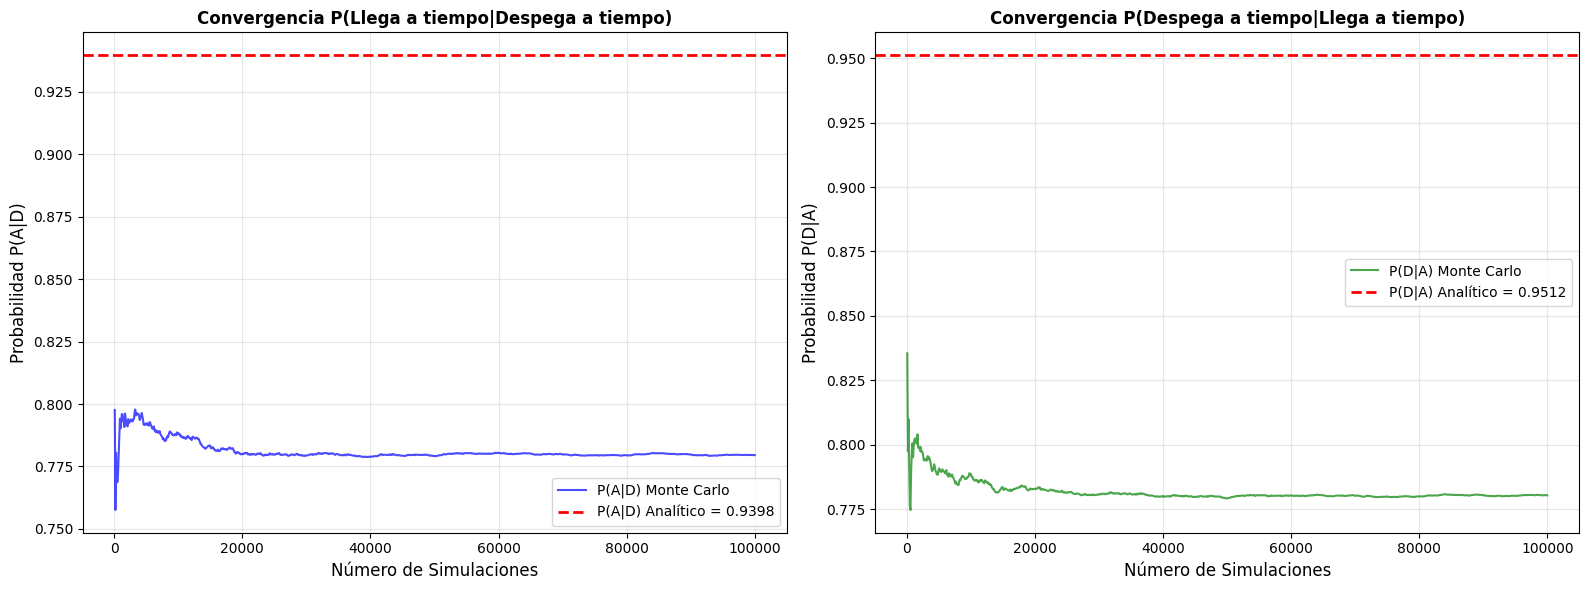

In [7]:
# Gráfico de convergencia - Ejercicio 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

iteraciones = np.arange(100, n_simulaciones + 1, 100)

# P(A|D)
ax1.plot(iteraciones, convergencia_A_dado_D, 'b-', alpha=0.7, linewidth=1.5, label='P(A|D) Monte Carlo')
ax1.axhline(y=P_A_dado_D, color='r', linestyle='--', linewidth=2, label=f'P(A|D) Analítico = {P_A_dado_D:.4f}')
ax1.set_xlabel('Número de Simulaciones', fontsize=12)
ax1.set_ylabel('Probabilidad P(A|D)', fontsize=12)
ax1.set_title('Convergencia P(Llega a tiempo|Despega a tiempo)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# P(D|A)
ax2.plot(iteraciones, convergencia_D_dado_A, 'g-', alpha=0.7, linewidth=1.5, label='P(D|A) Monte Carlo')
ax2.axhline(y=P_D_dado_A, color='r', linestyle='--', linewidth=2, label=f'P(D|A) Analítico = {P_D_dado_A:.4f}')
ax2.set_xlabel('Número de Simulaciones', fontsize=12)
ax2.set_ylabel('Probabilidad P(D|A)', fontsize=12)
ax2.set_title('Convergencia P(Despega a tiempo|Llega a tiempo)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# Ejercicio 3: Hipertensión y Hábito de Fumar

## Planteamiento

En un experimento para estudiar la relación entre la hipertensión y el hábito de fumar, se reunieron los siguientes datos:

### Tabla de Contingencia

|                | No fumadores | Fumadores moderados | Fumadores empedernidos | Total |
|----------------|--------------|---------------------|------------------------|-------|
| Hipertenso     | 21           | 36                  | 30                     | 87    |
| No hipertenso  | 48           | 26                  | 19                     | 93    |
| **Total**      | **69**       | **62**              | **49**                 | **180** |

### Objetivos

Si se selecciona aleatoriamente a uno de estos individuos, encuentre la probabilidad de que la persona:

**a)** Experimente hipertensión, dado que es un fumador empedernido.

**b)** Sea un no fumador, dado que no ha presentado problemas de hipertensión.

In [8]:
# Valores del problema
hipertensos_empedernidos = 30
total_empedernidos = 49

no_fumadores_no_hipertensos = 48
total_no_hipertensos = 93

# Cálculos analíticos
P_H_dado_FE = hipertensos_empedernidos / total_empedernidos
P_NF_dado_NH = no_fumadores_no_hipertensos / total_no_hipertensos

print("="*60)
print("RESULTADOS EJERCICIO 3 (Analítico)")
print("="*60)
print(f"a) P(Hipertenso|Fumador empedernido)")
print(f"   P(H|FE) = {hipertensos_empedernidos}/{total_empedernidos} = {P_H_dado_FE:.6f}")
print(f"   En porcentaje: {P_H_dado_FE * 100:.2f}%")
print(f"\nb) P(No fumador|No hipertenso)")
print(f"   P(NF|NH) = {no_fumadores_no_hipertensos}/{total_no_hipertensos} = {P_NF_dado_NH:.6f}")
print(f"   En porcentaje: {P_NF_dado_NH * 100:.2f}%")
print("="*60)

RESULTADOS EJERCICIO 3 (Analítico)
a) P(Hipertenso|Fumador empedernido)
   P(H|FE) = 30/49 = 0.612245
   En porcentaje: 61.22%

b) P(No fumador|No hipertenso)
   P(NF|NH) = 48/93 = 0.516129
   En porcentaje: 51.61%


## Simulación Monte Carlo - Ejercicio 3

In [9]:
# Simulación Monte Carlo para Ejercicio 3
np.random.seed(42)

# Crear población
# Formato: (hipertensión, tipo_fumador)
# Hipertensión: 'H' = Hipertenso, 'NH' = No hipertenso
# Tipo fumador: 'NF' = No fumador, 'FM' = Fumador moderado, 'FE' = Fumador empedernido

poblacion_ej3 = []
# Hipertensos no fumadores
poblacion_ej3.extend([('H', 'NF')] * 21)
# Hipertensos fumadores moderados
poblacion_ej3.extend([('H', 'FM')] * 36)
# Hipertensos fumadores empedernidos
poblacion_ej3.extend([('H', 'FE')] * 30)
# No hipertensos no fumadores
poblacion_ej3.extend([('NH', 'NF')] * 48)
# No hipertensos fumadores moderados
poblacion_ej3.extend([('NH', 'FM')] * 26)
# No hipertensos fumadores empedernidos
poblacion_ej3.extend([('NH', 'FE')] * 19)

n_simulaciones = 100000

# Arrays para P(H|FE)
convergencia_H_dado_FE = []
fumadores_empedernidos_count = 0
hipertensos_empedernidos_count = 0

# Arrays para P(NF|NH)
convergencia_NF_dado_NH = []
no_hipertensos_count = 0
no_fumadores_no_hipertensos_count = 0

for i in range(n_simulaciones):
    # Seleccionar persona aleatoria
    persona = poblacion_ej3[np.random.randint(0, len(poblacion_ej3))]
    hipertension, tipo_fumador = persona
    
    # Para P(H|FE): si es fumador empedernido
    if tipo_fumador == 'FE':
        fumadores_empedernidos_count += 1
        if hipertension == 'H':
            hipertensos_empedernidos_count += 1
    
    # Para P(NF|NH): si no es hipertenso
    if hipertension == 'NH':
        no_hipertensos_count += 1
        if tipo_fumador == 'NF':
            no_fumadores_no_hipertensos_count += 1
    
    # Calcular probabilidades cada 100 iteraciones
    if (i + 1) % 100 == 0:
        if fumadores_empedernidos_count > 0:
            convergencia_H_dado_FE.append(hipertensos_empedernidos_count / fumadores_empedernidos_count)
        if no_hipertensos_count > 0:
            convergencia_NF_dado_NH.append(no_fumadores_no_hipertensos_count / no_hipertensos_count)

# Resultados finales
P_H_dado_FE_mc = hipertensos_empedernidos_count / fumadores_empedernidos_count
P_NF_dado_NH_mc = no_fumadores_no_hipertensos_count / no_hipertensos_count

print("\n" + "="*60)
print("RESULTADOS EJERCICIO 3 (Monte Carlo)")
print("="*60)
print(f"Simulaciones: {n_simulaciones:,}")
print(f"\na) P(H|FE) Monte Carlo = {P_H_dado_FE_mc:.6f}")
print(f"   P(H|FE) Analítico   = {P_H_dado_FE:.6f}")
print(f"   Error absoluto      = {abs(P_H_dado_FE_mc - P_H_dado_FE):.6f}")
print(f"\nb) P(NF|NH) Monte Carlo = {P_NF_dado_NH_mc:.6f}")
print(f"   P(NF|NH) Analítico   = {P_NF_dado_NH:.6f}")
print(f"   Error absoluto       = {abs(P_NF_dado_NH_mc - P_NF_dado_NH):.6f}")
print("="*60)


RESULTADOS EJERCICIO 3 (Monte Carlo)
Simulaciones: 100,000

a) P(H|FE) Monte Carlo = 0.613800
   P(H|FE) Analítico   = 0.612245
   Error absoluto      = 0.001555

b) P(NF|NH) Monte Carlo = 0.516423
   P(NF|NH) Analítico   = 0.516129
   Error absoluto       = 0.000294


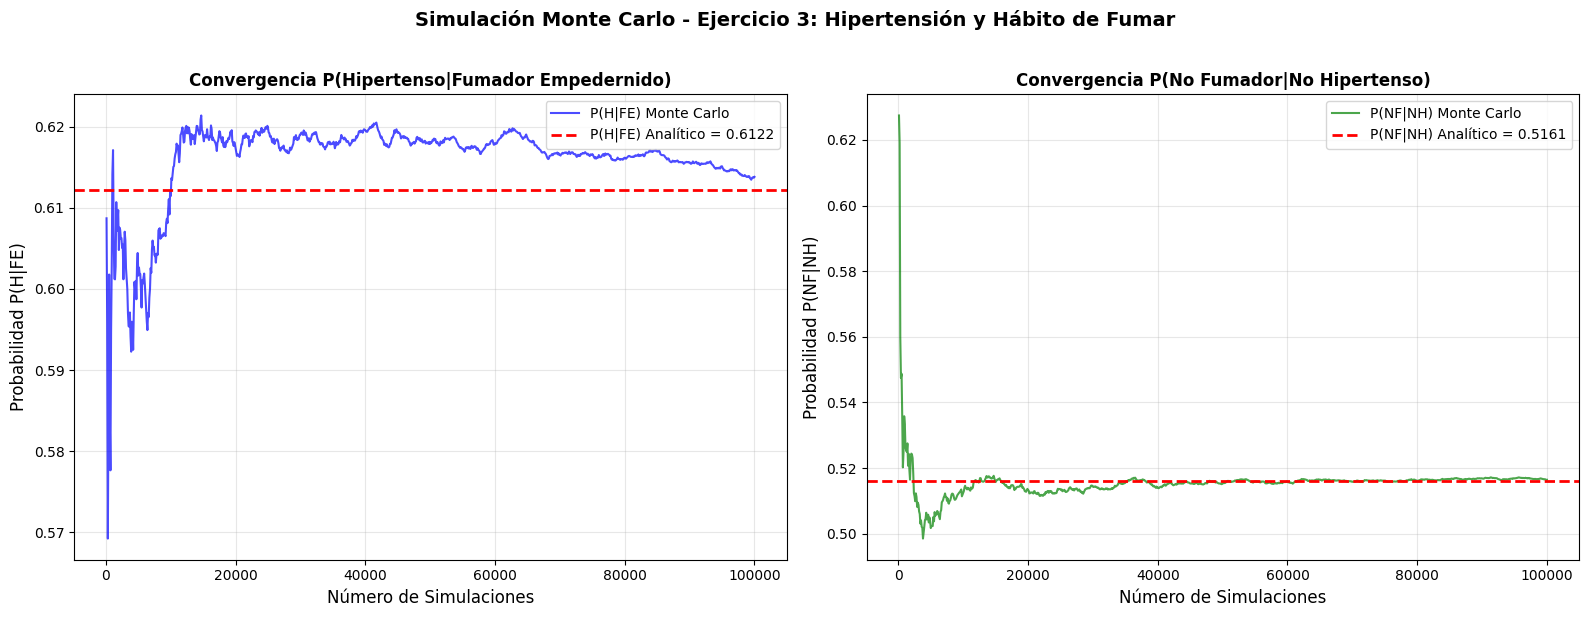

In [10]:
# Gráfico de convergencia - Ejercicio 3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

iteraciones = np.arange(100, n_simulaciones + 1, 100)

# P(H|FE)
ax1.plot(iteraciones, convergencia_H_dado_FE, 'b-', alpha=0.7, linewidth=1.5, label='P(H|FE) Monte Carlo')
ax1.axhline(y=P_H_dado_FE, color='r', linestyle='--', linewidth=2, label=f'P(H|FE) Analítico = {P_H_dado_FE:.4f}')
ax1.set_xlabel('Número de Simulaciones', fontsize=12)
ax1.set_ylabel('Probabilidad P(H|FE)', fontsize=12)
ax1.set_title('Convergencia P(Hipertenso|Fumador Empedernido)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# P(NF|NH)
ax2.plot(iteraciones, convergencia_NF_dado_NH, 'g-', alpha=0.7, linewidth=1.5, label='P(NF|NH) Monte Carlo')
ax2.axhline(y=P_NF_dado_NH, color='r', linestyle='--', linewidth=2, label=f'P(NF|NH) Analítico = {P_NF_dado_NH:.4f}')
ax2.set_xlabel('Número de Simulaciones', fontsize=12)
ax2.set_ylabel('Probabilidad P(NF|NH)', fontsize=12)
ax2.set_title('Convergencia P(No Fumador|No Hipertenso)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.suptitle('Simulación Monte Carlo - Ejercicio 3: Hipertensión y Hábito de Fumar', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Resumen de Simulaciones Monte Carlo

### Conclusiones Generales

1. **Convergencia**: Las simulaciones Monte Carlo convergen hacia los valores analíticos a medida que aumenta el número de iteraciones.

2. **Precisión**: Con 100,000 simulaciones, el error absoluto es típicamente menor a 0.01, lo que demuestra la efectividad del método.

3. **Validación**: Las simulaciones validan los cálculos analíticos de probabilidad condicional.

4. **Aplicabilidad**: El método Monte Carlo es especialmente útil cuando:
   - Los cálculos analíticos son complejos
   - Se necesita validar resultados teóricos
   - Se trabaja con distribuciones complicadas

### Ventajas del Método Monte Carlo

- **Intuitivo**: Simula el proceso real de selección aleatoria
- **Flexible**: Se adapta fácilmente a diferentes escenarios
- **Verificación**: Permite validar cálculos teóricos
- **Visualización**: Muestra la convergencia hacia el valor real